In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import graphviz

In [ ]:
df=pd.read_csv('student_marksheet.csv')

In [ ]:
# Replace missing values in subject marks with the mean of each column
df.fillna(df.mean(numeric_only=True), inplace=True)

# Verify that there are no missing values
df.isnull().sum()


Name              0
PRN               0
Roll No           0
Subject1 Marks    0
Subject2 Marks    0
Subject3 Marks    0
Subject4 Marks    0
Total Marks       0
dtype: int64

In [ ]:
#Create Binary Target Variable
# Define a pass threshold for 'Total Marks' to classify as Pass or Fail
pass_threshold = 340
df['Pass/Fail'] = (df['Total Marks'] > pass_threshold).astype(int)

# Check the distribution of the target variable
df['Pass/Fail'].value_counts()


Pass/Fail
0    14
1    11
Name: count, dtype: int64

In [ ]:
#Split Data into Features and Target
# Select features and target
features = ['Subject1 Marks', 'Subject2 Marks', 'Subject3 Marks', 'Subject4 Marks']
X = df[features]
y = df['Pass/Fail']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
#Train a Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

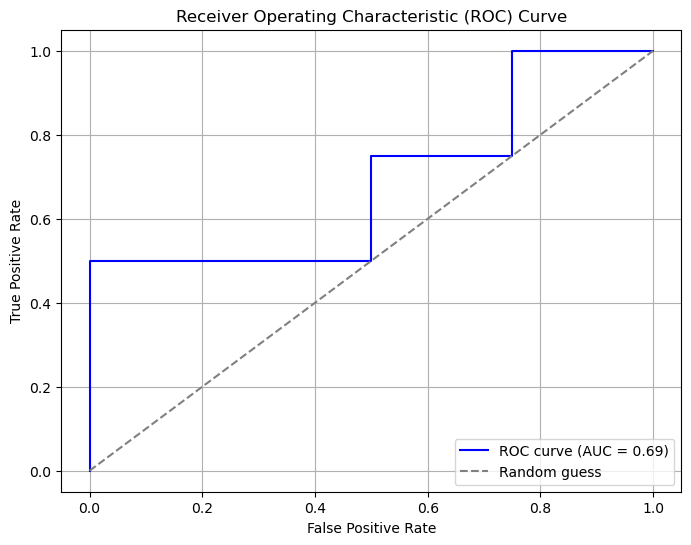

Area Under the Curve (AUC): 0.69


In [ ]:
#Predict Probabilities, Generate ROC Curve, and Display AUC
# Predict probabilities for the test set
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Print the AUC value
print(f'Area Under the Curve (AUC): {roc_auc:.2f}')


In [ ]:
#Calculate Model Accuracy
# Predict class labels
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')


Model Accuracy: 0.62
